In [ ]:
from google.colab import auth
from google.auth import default
import gspread
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Authenticate
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
sheet2 = gc.open_by_url("https://docs.google.com/spreadsheets/d/1BwtZKinz0BMmnY13MDYl772gbJZwP92jXU_eX3DTaNU/edit").worksheet("Form Responses 1")

# Convert to pandas DataFrame
data = sheet2.get_all_records()
df = pd.DataFrame(data)

In [ ]:
# Completed vs dropout
df['is_complete'] = df['eventTypeEntry'] == 'race_complete'

# Early dropout = dropout before 50% progress
df['early_dropout'] = (df['eventTypeEntry'] == 'dropout') & (df['progressPercentageEntry'] < 50)

# Keep only finished races when analyzing completion times
finished = df[df['is_complete']].copy()

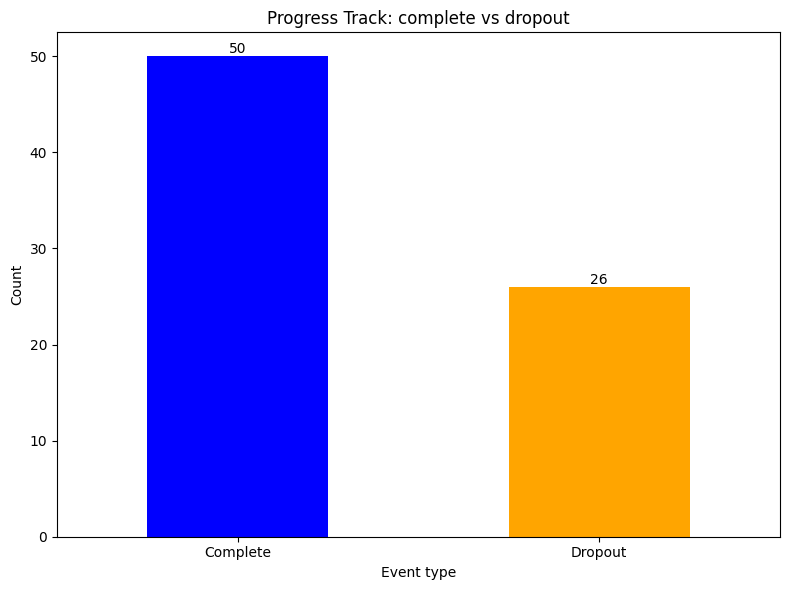

In [ ]:
plt.figure(figsize=(8, 6))

counts = df['eventTypeEntry'].value_counts()
ax = counts.plot(kind='bar', color=['blue', 'orange'])

plt.title('Progress Track: complete vs dropout')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Complete', 'Dropout'], rotation=0)

# add count labels on top of bars
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, f'{count}',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

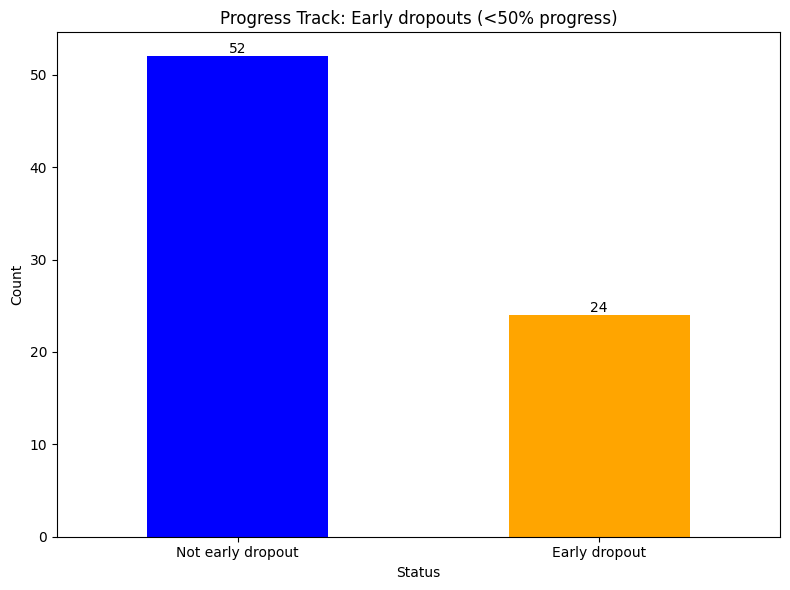

In [ ]:
plt.figure(figsize=(8, 6))

counts = df['early_dropout'].value_counts()
ax = counts.plot(kind='bar', color=['blue', 'orange'])

plt.title('Progress Track: Early dropouts (<50% progress)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not early dropout', 'Early dropout'], rotation=0)

# add count labels on top of bars
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, f'{count}',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()